# Box Office Revenue Analysis and Prediction

# INTRODUCTION AND PROBLEM STATEMENT

In recent years, the movie market has been growing larger each year. This industry generates approximately billions dollars of revenue annually. The question of what makes a film successful has been asked for over the years, not just by you and me, large companies like Twenty First Century Fox, Universal Studios award million prizes to those who can improve their recommendation and prediction algorithms. This project attempts to address this question by using machine learning techniques to predict film box office.

<h1><font color='blue'>Import required libraries</font></h1>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

<h1><font color='blue'>Data Loading & Exploration</font></h1>

In [ ]:
# Load the dataset into the movie name dataframe
movie = pd.read_csv(r"C:\Users\localadmin\Documents\NPCI PROJECT\Movie_data.csv")

##### Let's have look at the data

In [ ]:
movie.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


#### Let's get some statistics about the data

In [ ]:
movie.shape

(5043, 28)

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


<h1><font color='blue'>Data Cleaning</font></h1>

#### In this we have seen that there are as many NULL values in the dataset but first we have to delete all the features which are of no use.

In [ ]:
drop = ['director_name', 'director_facebook_likes', 'language', 'plot_keywords','actor_2_name', 'actor_1_name'
      , 'movie_imdb_link', 'num_user_for_reviews', 'content_rating', 'aspect_ratio', 'actor_3_name']
movie.drop(drop, axis=1, inplace=True)

In [ ]:
movie.head(3)

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,723.0,178.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,0.0,USA,237000000.0,2009.0,936.0,7.9,33000
1,Color,302.0,169.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,0.0,USA,300000000.0,2007.0,5000.0,7.1,0
2,Color,602.0,148.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,1.0,UK,245000000.0,2015.0,393.0,6.8,85000


In [ ]:
# checking the null values
movie.isnull().sum()

color                         19
num_critic_for_reviews        50
duration                      15
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
genres                         0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
country                        5
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

<AxesSubplot:>

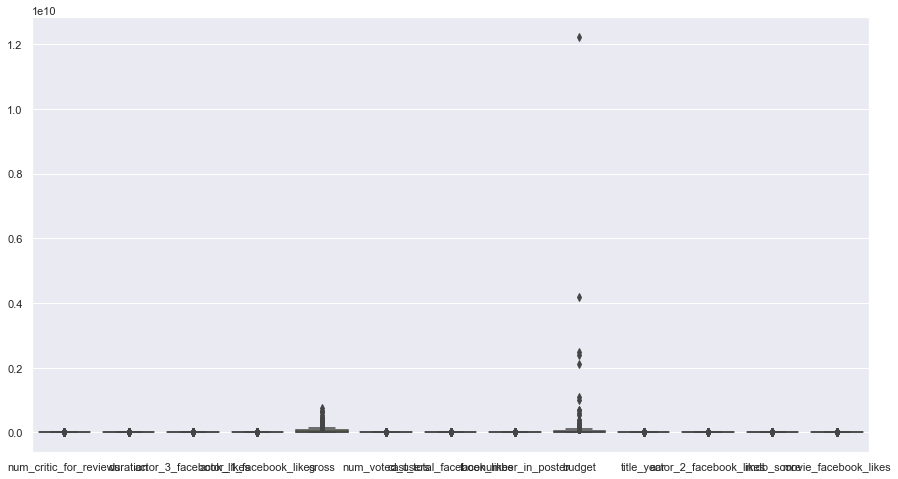

In [ ]:
#Checking outliers for replacing the mean, mode, and meadian
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data = movie)

In [ ]:
# we observe that the null values of gross column have rating > 5 so we will 
# take the average values of gross column which have imdb_score >5
gross = movie[(movie['imdb_score'] > 5)]
a = movie['gross'].mean()
a

48468407.52680933

In [ ]:
movie.corr()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.119994,0.275707,0.282306,0.305303,0.683176
duration,0.258486,1.000000,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.074276,-0.135038,0.131673,0.261662,0.196605
actor_3_facebook_likes,0.271646,0.123558,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.047451,0.096137,0.559662,0.052633,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.022639,0.086873,0.390487,0.076099,0.135348
gross,0.480601,0.250298,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.102179,0.030886,0.262768,0.198021,0.378082
num_voted_users,0.624943,0.314765,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.079621,0.007397,0.270790,0.410965,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.036557,0.109971,0.628404,0.085787,0.209786
facenumber_in_poster,-0.033897,0.013469,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.019559,0.061504,0.071228,-0.062958,0.008918
budget,0.119994,0.074276,0.047451,0.022639,0.102179,0.079621,0.036557,-0.019559,1.000000,0.045726,0.044236,0.030688,0.062039
title_year,0.275707,-0.135038,0.096137,0.086873,0.030886,0.007397,0.109971,0.061504,0.045726,1.000000,0.101890,-0.209167,0.218678


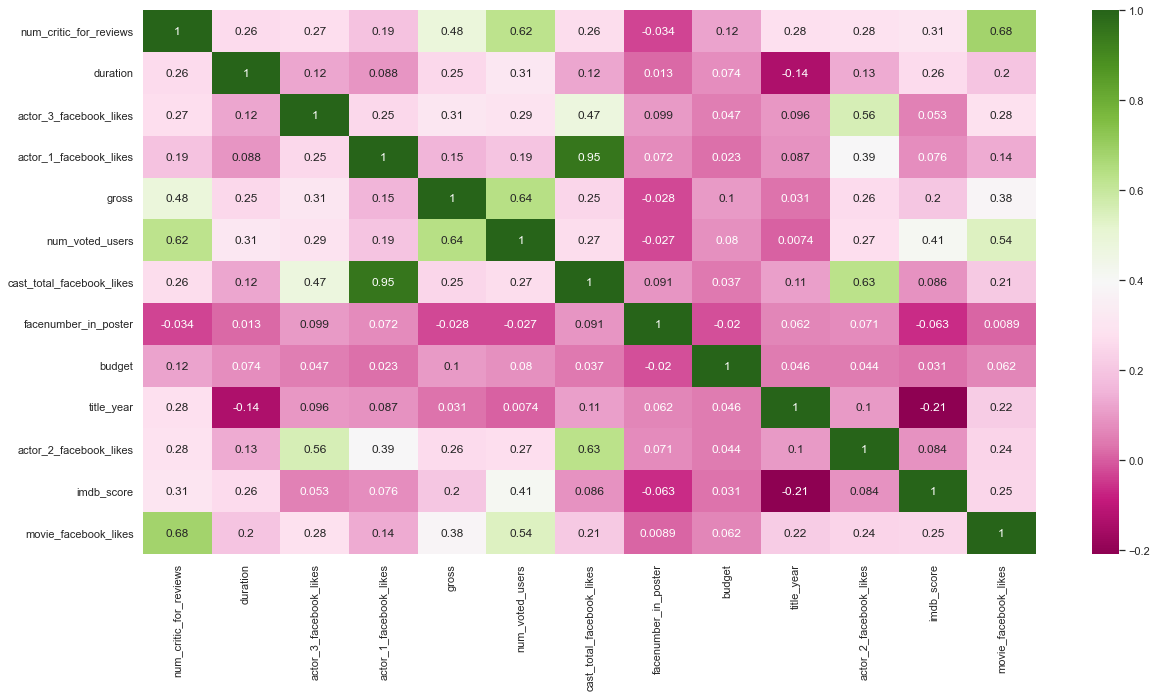

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(movie.corr(), annot=True, cmap='PiYG')
plt.show()
plt.close()

In [ ]:
movie['gross'] = movie['gross'].replace(np.nan, 48468407)

In [ ]:
a = movie['budget'].mean()
a = int(a)
a

39752620

In [ ]:
movie['budget'] = movie['budget'].replace(np.nan, 39752620)

In [ ]:
movie['budget']

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4        39752620.0
           ...     
5038     39752620.0
5039     39752620.0
5040         1400.0
5041     39752620.0
5042         1100.0
Name: budget, Length: 5043, dtype: float64

In [ ]:
movie.isnull().sum()

color                         19
num_critic_for_reviews        50
duration                      15
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                          0
genres                         0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
country                        5
budget                         0
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [ ]:
movie['color'].mode()
movie['color'] = movie['color'].replace(np.nan, 'Color')

In [ ]:
movie['duration']=movie['duration'].fillna(movie['duration'].mean())

In [ ]:
movie.dropna(axis=0,inplace=True)

In [ ]:
movie.isnull().sum()

color                        0
num_critic_for_reviews       0
duration                     0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
country                      0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [ ]:
movie.shape

(4865, 17)

<h1><font color='blue'>Exploratory Data Analysis</font></h1>

### 1. Which movie made the highest revenue

In [ ]:
movie[movie['gross'] == movie['gross'].max()]

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,723.0,178.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,0.0,USA,237000000.0,2009.0,936.0,7.9,33000


In [ ]:
movie.sort_values(by="gross",ascending=False).head(5)

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,723.0,178.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,0.0,USA,237000000.0,2009.0,936.0,7.9,33000
26,Color,315.0,194.0,794.0,29000.0,658672302.0,Drama|Romance,Titanic,793059,45223,0.0,USA,200000000.0,1997.0,14000.0,7.7,26000
29,Color,644.0,124.0,1000.0,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Jurassic World,418214,8458,0.0,USA,150000000.0,2015.0,2000.0,7.0,150000
17,Color,703.0,173.0,19000.0,26000.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,995415,87697,3.0,USA,220000000.0,2012.0,21000.0,8.1,123000
794,Color,703.0,173.0,19000.0,26000.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,995415,87697,3.0,USA,220000000.0,2012.0,21000.0,8.1,123000


<h3><font color='red'>Avatar made the highest revenue</font></h3>

### 2. Which movie is the most expensive?

In [ ]:
movie[movie['budget'] == movie['budget'].max()]

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
2988,Color,363.0,110.0,74.0,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,The Host,68883,1173,0.0,South Korea,1.221550e+10,2006.0,398.0,7.0,7000


In [ ]:
movie.sort_values(by="budget",ascending=False).head(5)

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
2988,Color,363.0,110.0,74.0,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,The Host,68883,1173,0.0,South Korea,1.221550e+10,2006.0,398.0,7.0,7000
3859,Color,202.0,112.0,38.0,717.0,211667.0,Crime|Drama,Lady Vengeance,53508,907,0.0,South Korea,4.200000e+09,2005.0,126.0,7.7,4000
3005,Color,73.0,134.0,0.0,9.0,195888.0,Drama|Romance|War,Fateless,5603,11,0.0,Hungary,2.500000e+09,2005.0,2.0,7.1,607
2323,Color,174.0,134.0,745.0,893.0,2298191.0,Adventure|Animation|Fantasy,Princess Mononoke,221552,2710,0.0,Japan,2.400000e+09,1997.0,851.0,8.4,11000
2334,Color,105.0,103.0,101.0,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,Steamboy,13727,991,1.0,Japan,2.127520e+09,2004.0,336.0,6.9,973


<h3><font color='red'>The Host is the most expensive film</font></h3>

### 3. Which movie is Longest?

In [ ]:
movie[movie['duration'] == movie['duration'].max()]

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1501,Color,12.0,330.0,672.0,848.0,4496583.0,Crime|Drama,"Blood In, Blood Out",23181,3227,2.0,USA,35000000.0,1993.0,674.0,8.0,6000


<h3><font color='red'>Blood In, Blood Out is the longest movie, with 330 minutes (5 hours and 30 minutes) of runtime.</font></h3>

### 4. In which year most movies were released?

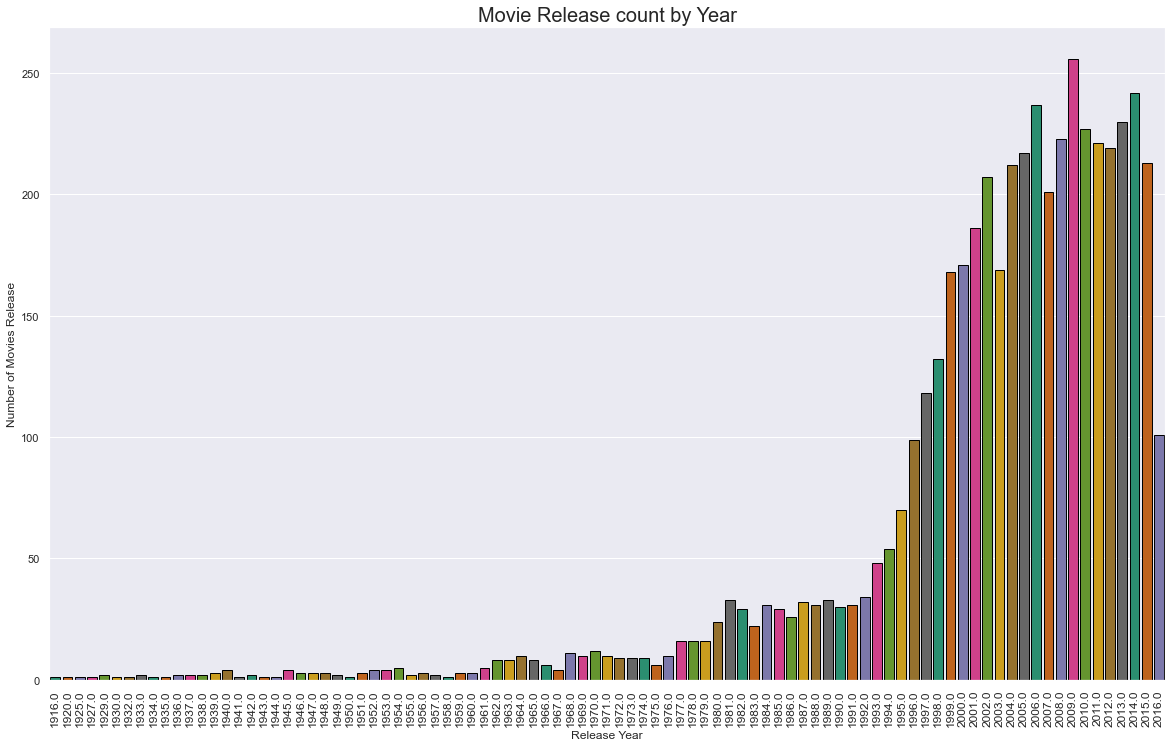

In [ ]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(movie['title_year'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Movie Release count by Year",fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [ ]:
movie['title_year'].value_counts().head(3)

2009.0    256
2014.0    242
2006.0    237
Name: title_year, dtype: int64

<h3><font color='red'>In 2009 total 256 movies were released.</font></h3>

### 5. Movies with Highest and Lowest ratings.

In [ ]:
movie[movie['imdb_score']==movie['imdb_score'].max()]

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1937,Color,199.0,142.0,461.0,11000.0,28341469.0,Crime|Drama,The Shawshank Redemption,1689764,13495,0.0,USA,25000000.0,1994.0,745.0,9.3,108000


In [ ]:
movie[movie['imdb_score']==movie['imdb_score'].min()]

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
2834,Color,84.0,115.0,41.0,569.0,73000942.0,Documentary|Music,Justin Bieber: Never Say Never,74351,714,1.0,USA,13000000.0,2011.0,69.0,1.6,62000


<h3><font color='red'>The Shawshank Redemption movie have imdb rating of 9.3 whereas Justin Bieber: Never Say Never	movie have lowest popularity with imdb rating of 1.6</font></h3>

### 6. which Countries created more than 50 movies?

In [ ]:
a = movie['country'].value_counts().rename_axis('country').to_frame('counts')
a.head(4)

,counts
country,
USA,3675
UK,432
France,151
Canada,121


Text(0, 0.5, 'Count of Total Movies')

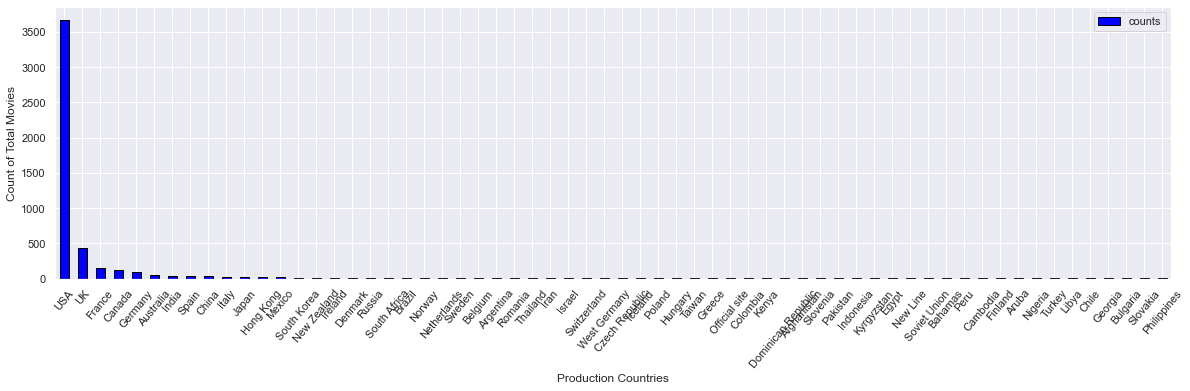

In [ ]:
a.plot(kind = "bar",color = "blue",edgecolor = "black",figsize = (20,5)) 
plt.xticks(rotation = 50)
plt.xlabel("Production Countries")
plt.ylabel("Count of Total Movies")

<h3><font color='red'>USA created the most number of movies</font></h3>

# Now we have to take the statistics about the quality of data

<AxesSubplot:>

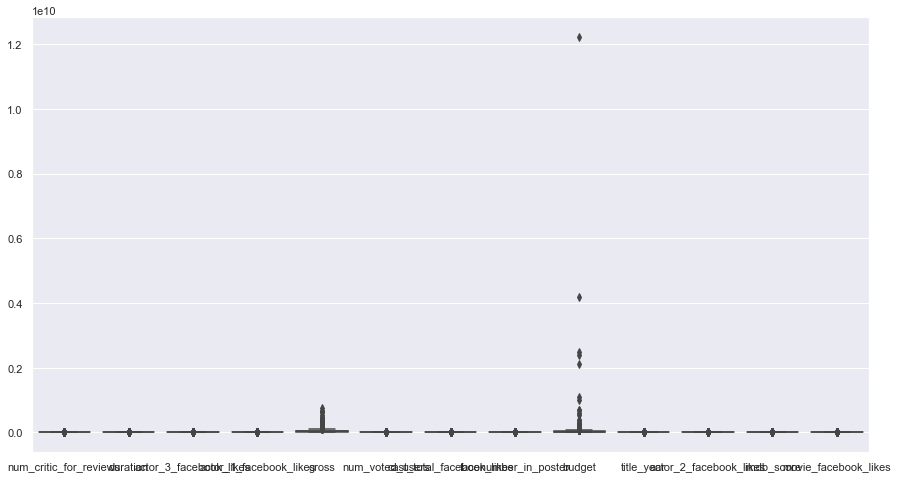

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data = movie)

<h1><font color='blue'>Feature Engineering</font></h1>

In [ ]:
movie.columns


Index(['color', 'num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'country', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# Separate the numerical and categorical features
df_num = movie.select_dtypes([np.number])
df_cat = movie.select_dtypes(['object'])

In [ ]:
df_num.head(3)

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,0.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,0.0,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,161.0,11000.0,200074175.0,275868,11700,1.0,245000000.0,2015.0,393.0,6.8,85000


In [ ]:
df_cat.head(3)

,color,genres,movie_title,country
0,Color,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA
1,Color,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA
2,Color,Action|Adventure|Thriller,Spectre,UK


### Here we have to handle the categorical features

In [ ]:
df_cat['color'].unique()

array(['Color', 'Black and White'], dtype=object)

In [ ]:
df_cat['color'].mask(df_cat['color'] == 'Color', 1, inplace=True)
df_cat['color'].mask(df_cat['color'] == 'Black and White', 0, inplace=True)

In [ ]:
df_cat.drop(['movie_title'],axis=1,inplace=True)

In [ ]:
df_cat.head(3)

,color,genres,country
0,1,Action|Adventure|Fantasy|Sci-Fi,USA
1,1,Action|Adventure|Fantasy,USA
2,1,Action|Adventure|Thriller,UK


In [ ]:
# we have to make the different genres column

In [ ]:
df_cat = pd.get_dummies(data = df_cat,drop_first=True) 

In [ ]:
concat = pd.concat([df_num, df_cat], axis=1)

In [ ]:
concat.head()

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,...,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_West Germany
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,0.0,237000000.0,2009.0,...,0,0,0,0,0,0,0,0,1,0
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,0.0,300000000.0,2007.0,...,0,0,0,0,0,0,0,0,1,0
2,602.0,148.0,161.0,11000.0,200074175.0,275868,11700,1.0,245000000.0,2015.0,...,0,0,0,0,0,0,0,1,0,0
3,813.0,164.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,250000000.0,2012.0,...,0,0,0,0,0,0,0,0,1,0
5,462.0,132.0,530.0,640.0,73058679.0,212204,1873,1.0,263700000.0,2012.0,...,0,0,0,0,0,0,0,0,1,0


<h1><font color='blue'>Predictive Modeling</font></h1>

In [ ]:
X = concat.drop(['gross'],axis=1)
y = concat['gross']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 42)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(973, 966)
(3892, 966)


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

0.44904253001708316

In [ ]:
lr.score(X_train,y_train)

0.6700257063080978

In [ ]:
r2_score(lr.predict(X_test), y_test)

0.35525897798544226

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
rf_model.score(X_test,y_test)

0.6618362293396136

In [ ]:
rf_model.score(X_train,y_train)

0.9506848509066973

In [ ]:
r2_score(rf_model.predict(X_test), y_test)

0.6168895872250062

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state = 42,objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 3,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  gamma = 1.45,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 42,
                                  n_estimators = 3000)

In [ ]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

[09:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_model.score(X_test,y_test)

0.6543684129148859

In [ ]:
xgb_model.score(X_train,y_train)

0.8458118728524925

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
dt = DecisionTreeRegressor(random_state = 42,min_samples_split = 9,splitter = 'best',
                          max_depth = 20) 

In [ ]:
dt.fit(X, y)

DecisionTreeRegressor(max_depth=20, min_samples_split=9, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
dt.score(X_test,y_test)*100

92.4325958319844

In [ ]:
dt.score(X_train,y_train)*100

93.47023051704197

In [ ]:
r2_score(dt.predict(X_test), y_test)*100

92.45854682397294

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()


In [ ]:
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)
lgb_model.score(X_train,y_train)

0.8886662457936909

In [ ]:
lgb_model.score(X_test,y_test)

0.6448390506879969

<AxesSubplot:xlabel='gross'>

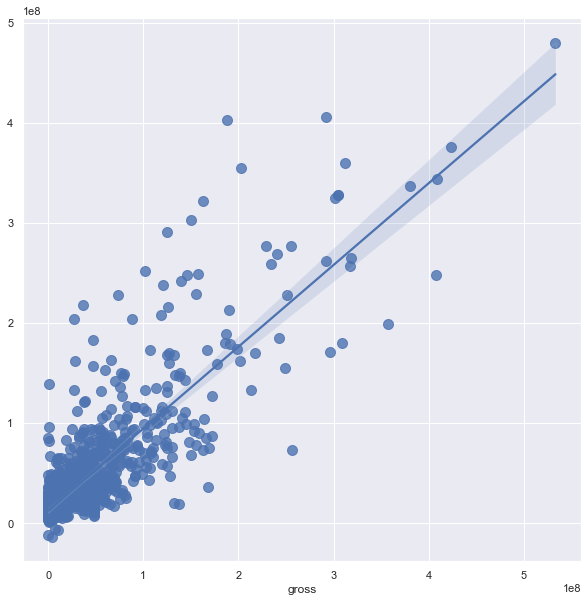

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, lgb_pred, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
print(metrics.r2_score(y_test, lgb_pred))

0.6448390506879969


Text(0, 0.5, 'Train/Test Accuracy Values')

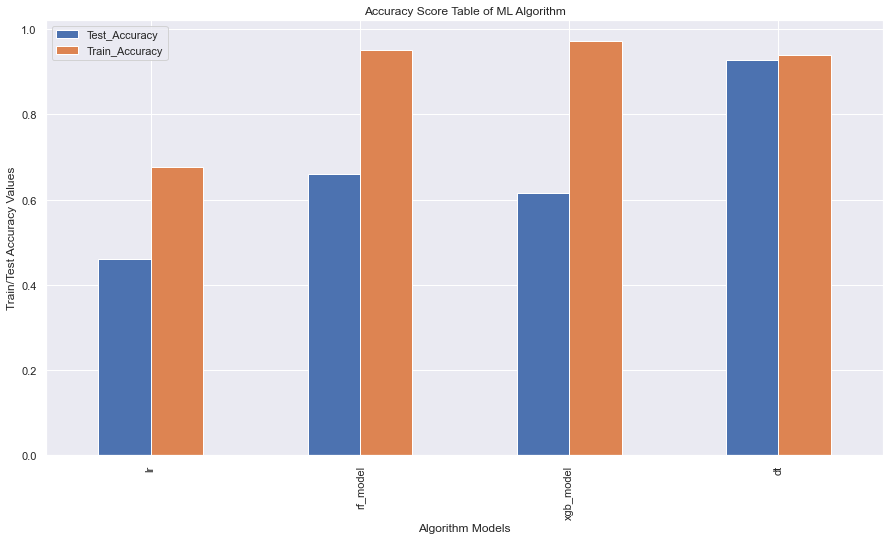

In [ ]:
movie = pd.DataFrame({

    "Test_Accuracy": [0.4601615102250698, 0.6594209972794154, 0.6144921004913265, 0.9283567070280343],

    "Train_Accuracy":[0.6775380127325399,0.9508094064644639,0.9724691328197793,0.9392697110774251]},

    index = ['lr', 'rf_model', 'xgb_model', 'dt'])

movie.plot(kind="bar",figsize=(15, 8))

plt.title('Accuracy Score Table of ML Algorithm')

plt.xlabel('Algorithm Models')

plt.ylabel('Train/Test Accuracy Values')

<h1><font color='blue'>Saving the best Model</font></h1>

In [ ]:
import pickle

In [ ]:
# open a file, where you want to store the data
file=open('decision_tree.pkl','wb')

In [ ]:
# dump information to that file
pickle.dump(dt,file)

In [ ]:
#Load the model
model=open('decision_tree.pkl','rb')
forest=pickle.load(model)

In [ ]:
y_prediction=dt.predict(X_test)

In [ ]:
# Output of our project on the test dataset
y_prediction[0:10]

array([2.55275206e+07, 1.30316701e+06, 8.44977175e+06, 6.97000000e+07,
       2.17353800e+05, 3.56365402e+07, 4.60550896e+07, 1.14133717e+08,
       7.08353571e+06, 4.19923671e+07])